In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

# **Exploring: shape, type, & unique labels of data**

Data shape: (70000, 784)
Target shape: (70000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


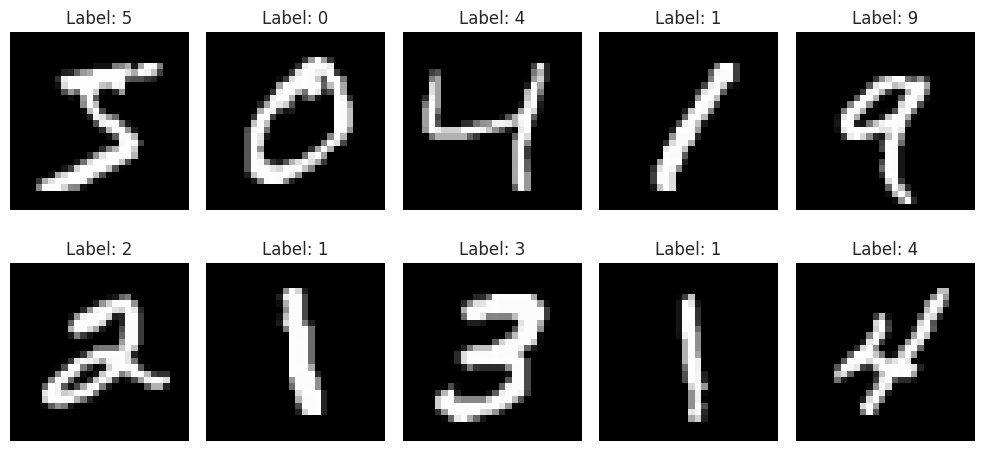

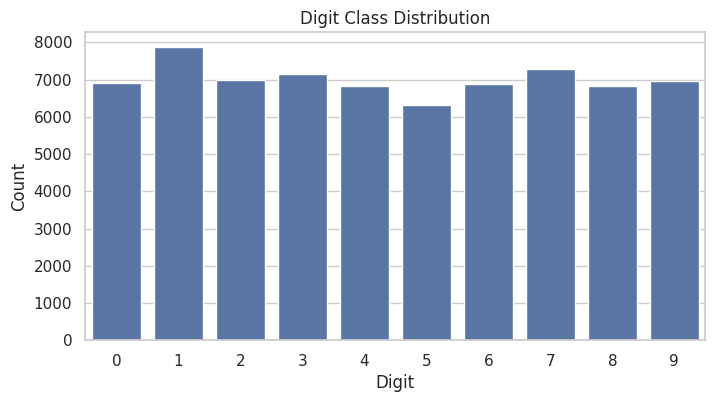

In [3]:
sns.set(style="whitegrid")

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

print("Data shape:", X.shape)
print("Target shape:", y.shape)
print("Unique labels:", np.unique(y))

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


# **Mean image per class**

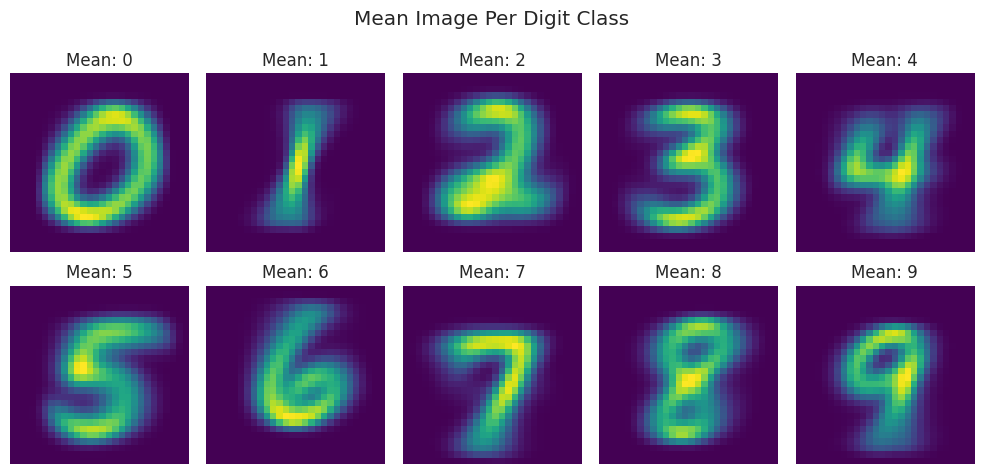

In [4]:
mean_images = []

plt.figure(figsize=(10, 5))
for digit in range(10):
    digit_images = X[y == digit]
    mean_image = digit_images.mean(axis=0).values.reshape(28, 28)
    mean_images.append(mean_image)

    plt.subplot(2, 5, digit + 1)
    plt.imshow(mean_image, cmap='viridis')
    plt.title(f"Mean: {digit}")
    plt.axis('off')

plt.suptitle("Mean Image Per Digit Class")
plt.tight_layout()
plt.savefig("mean_images.png")
plt.show()

# **PCA Visualization**

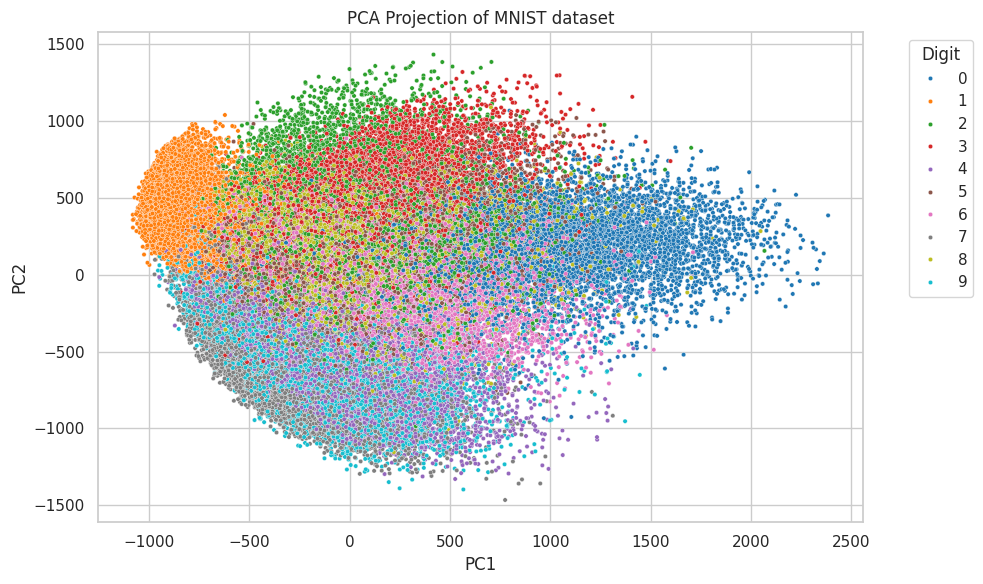

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', legend='full', s=10)
plt.title("PCA Projection of MNIST dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("pca_projection.png")
plt.show()


# **t-SNE Visualization**

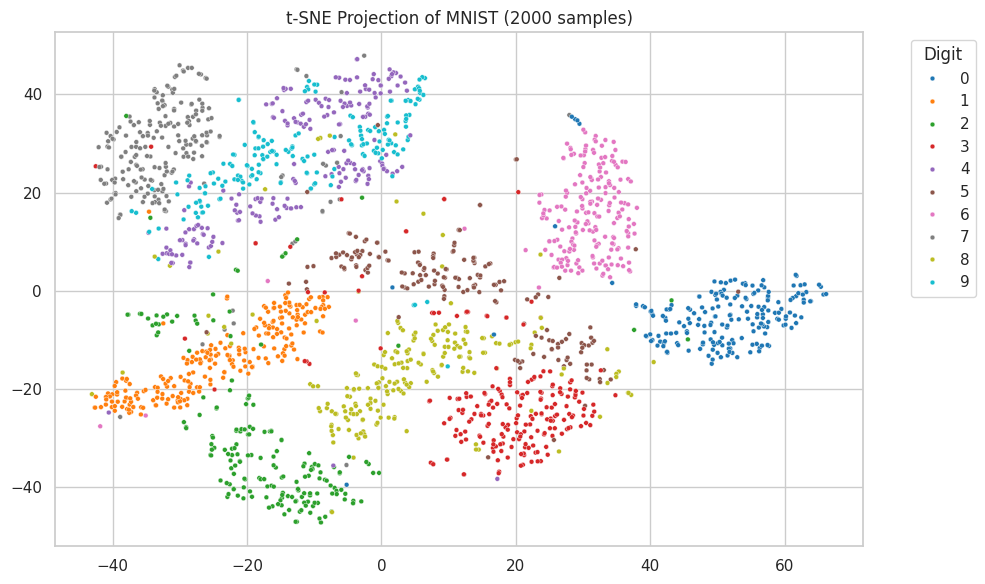

In [6]:
from sklearn.manifold import TSNE

sample_size = 2000
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X.iloc[indices]
y_sample = y.iloc[indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette='tab10', legend='full', s=12)
plt.title("t-SNE Projection of MNIST (2000 samples)")
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("tsne_projection.png")
plt.show()
